In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
import scipy.stats as sp
import networkx.algorithms.community as nxcom
import plotly.graph_objects as go

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        item_path = os.path.join(datasets_folder,item)
        item_name = item.split(".")[0]
        print("dataset named "+item_name+" imported")
        df = pd.read_csv(item_path)
        d["{}".format(item_name)] = nx.from_pandas_edgelist(df, 'City1', 'City2', edge_attr=['Passenger_Trips','Aircraft_Trips','Seats','Total Distance_(km)','City Distance_(km)'],create_using = nx.Graph())
    print("finish importing")
    return d

In [3]:
graphs = import_datasets("data/Australia_airline/yearly_data")

dataset named 1990 imported
dataset named 1984 imported
dataset named 1985 imported
dataset named 1991 imported
dataset named 1987 imported
dataset named 1993 imported
dataset named 1992 imported
dataset named 1986 imported
dataset named 1996 imported
dataset named 1997 imported
dataset named 1995 imported
dataset named 1994 imported
dataset named 2008 imported
dataset named 2020 imported
dataset named 2021 imported
dataset named 2009 imported
dataset named 2022 imported
dataset named 2019 imported
dataset named 2018 imported
dataset named 2001 imported
dataset named 2015 imported
dataset named 2014 imported
dataset named 2000 imported
dataset named 2016 imported
dataset named 2002 imported
dataset named 2003 imported
dataset named 2017 imported
dataset named 2013 imported
dataset named 2007 imported
dataset named 2006 imported
dataset named 2012 imported
dataset named 2004 imported
dataset named 2010 imported
dataset named 2011 imported
dataset named 2005 imported
dataset named 1999 i

# 3.1.2 Fig4 correlation between degree and betweenness centrality

## a) weighted normalized degree_centrality and weighted betweenness_centrality

In [4]:
graphs['2019'].degree()

DegreeView({'ADELAIDE': 8, 'ALICE SPRINGS': 2, 'BRISBANE': 18, 'CANBERRA': 4, 'GOLD COAST': 3, 'MELBOURNE': 14, 'PERTH': 11, 'PORT LINCOLN': 1, 'SYDNEY': 23, 'ALBURY': 1, 'DARWIN': 5, 'ARMIDALE': 1, 'AYERS ROCK': 1, 'BALLINA': 1, 'CAIRNS': 4, 'EMERALD': 1, 'GLADSTONE': 1, 'HAMILTON ISLAND': 3, 'HOBART': 3, 'MACKAY': 1, 'MOUNT ISA': 1, 'NEWCASTLE': 2, 'PROSERPINE': 2, 'ROCKHAMPTON': 1, 'TOWNSVILLE': 3, 'BROOME': 1, 'BUNDABERG': 1, 'COFFS HARBOUR': 1, 'DUBBO': 1, 'GERALDTON': 1, 'KALGOORLIE': 1, 'KARRATHA': 1, 'LAUNCESTON': 2, 'MILDURA': 1, 'NEWMAN': 1, 'PORT HEDLAND': 1, 'PORT MACQUARIE': 1, 'SUNSHINE COAST': 2, 'TAMWORTH': 1, 'WAGGA WAGGA': 1})

In [5]:
degree_centrality = {}
for name, graph in graphs.items():
    degree = graph.degree(weight='Aircraft_Trips')
    d = dict(degree)
    max_degree = max(d.values())
    for i in d.keys():
        d[i] = d[i]/max_degree
    degree_centrality[name]=d
    #degree_centrality_weighted = deg/max_degree for deg in dict(degree).values()
    #degree_centrality[name]=degree

In [6]:
betweenness_centrality_weighted = {}
for name, graph in graphs.items():
    b = nx.betweenness_centrality(graph, weight = 'Aircraft_Trips')
    betweenness_centrality_weighted[name]=b

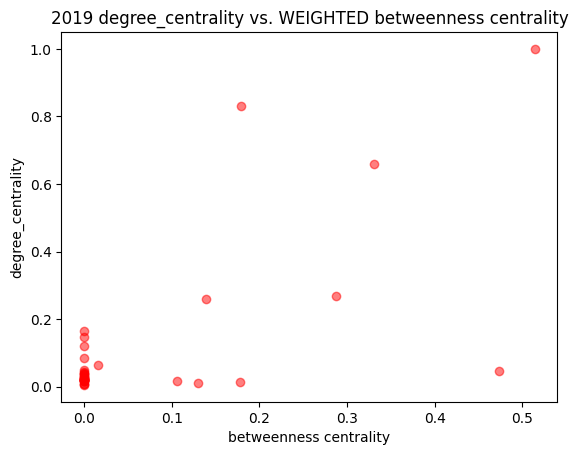

Pearson's correlation: 0.691663684181362


In [7]:
x=list(betweenness_centrality_weighted['2019'].values())
y=list(degree_centrality['2019'].values())
plt.scatter(x, y, color = 'red', alpha=0.5)
plt.xlabel('betweenness centrality')
plt.ylabel('degree_centrality')
plt.title('2019 degree_centrality vs. WEIGHTED betweenness centrality')
plt.show()
pearson = sp.pearsonr(x,y)[0]
print(f"Pearson's correlation: {pearson}")

In [8]:
years = np.arange(1984,2022)

In [9]:
corr = []
for i in years:
    year = str(i)
    x = list(betweenness_centrality_weighted[year].values())
    y = list(degree_centrality[year].values())
    pearson = sp.pearsonr(x,y)[0]
    corr.append(pearson)

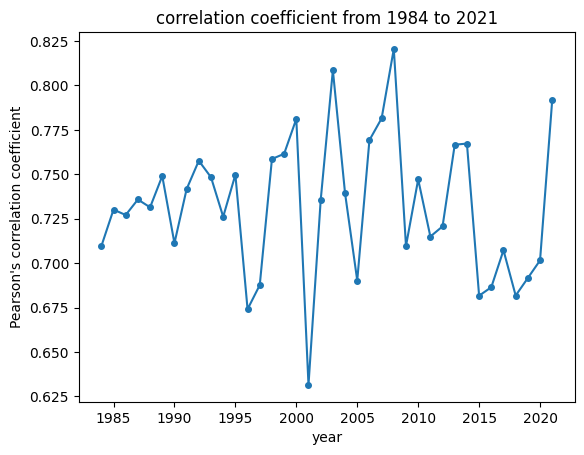

In [10]:
plt.plot(years, corr, linestyle='-', marker='o', markersize = 4)
plt.xlabel('year')
plt.ylabel('Pearson\'s correlation coefficient')
plt.title('correlation coefficient from 1984 to 2021')
plt.show()

## b) unweighted betweenness_centrality

In [11]:
degree_centrality = {}
for name, graph in graphs.items():
    b = nx.degree_centrality(graph)
    degree_centrality[name]=b

In [12]:
betweenness_centrality_unweighted = {}
for name, graph in graphs.items():
    b = nx.betweenness_centrality(graph)
    betweenness_centrality_unweighted[name]=b

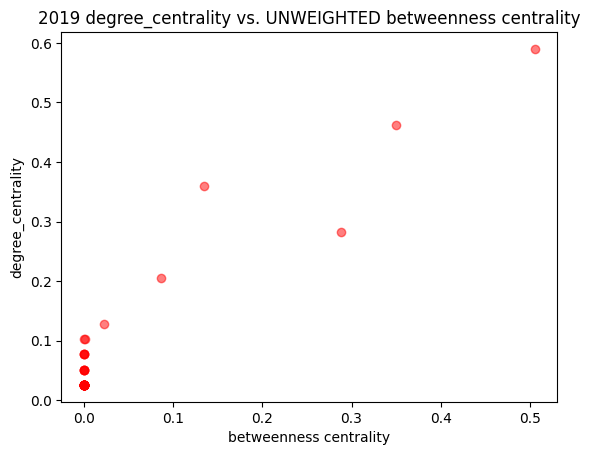

Pearson's correlation: 0.9483078286995766


In [13]:
x=list(betweenness_centrality_unweighted['2019'].values())
y=list(degree_centrality['2019'].values())
plt.scatter(x, y, color = 'red', alpha=0.5)
plt.xlabel('betweenness centrality')
plt.ylabel('degree_centrality')
plt.title('2019 degree_centrality vs. UNWEIGHTED betweenness centrality')
plt.show()
pearson = sp.pearsonr(x,y)[0]
print(f"Pearson's correlation: {pearson}")

In [14]:
corr = []
for i in years:
    year = str(i)
    x = list(betweenness_centrality_unweighted[year].values())
    y = list(degree_centrality[year].values())
    pearson = sp.pearsonr(x,y)[0]
    corr.append(pearson)

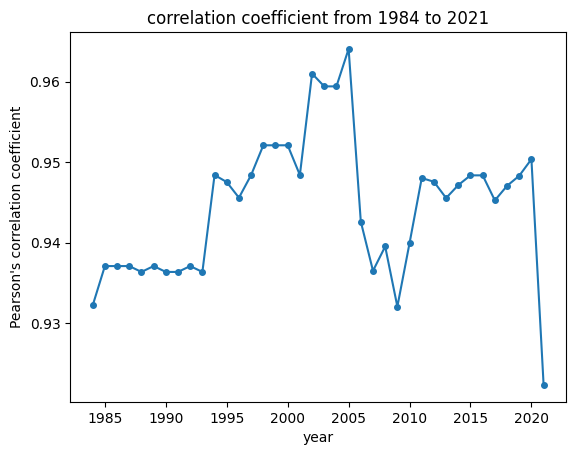

In [15]:
plt.plot(years, corr, linestyle='-', marker='o', markersize = 4)
plt.xlabel('year')
plt.ylabel('Pearson\'s correlation coefficient')
plt.title('correlation coefficient from 1984 to 2021')
plt.show()

# 3.2.3 Evolving communities

## a) Clauset Newman and Moore algorithm

In [16]:
comm_CNM = {}
for name, graph in graphs.items():
    cnm = sorted(nxcom.greedy_modularity_communities(graph), key=len, reverse=True)
    comm_CNM[name] = cnm

In [17]:
#add community to node attributes
#return {node: community number}
def cnm_community_nodes(graph, comm):
    d = {}
    for community,nodes in enumerate(comm):
        for node in nodes:
            graph.nodes[node]['community'] = community + 1
            d[node] = graph.nodes[node]['community']
    return d

In [18]:
#community for all 3 datasets
community_graphs = {}
for name, graph in graphs.items():
    community = cnm_community_nodes(graph, comm_CNM[name])
    community_graphs[name] = community

In [19]:
def plot_community(name, graph):
    #plt.figure(figsize=(12,12))  
    plt.title("Clauset Newman and Moore: dataset " + name)
    nx.draw(graph, node_color = [community_graphs[name][v] for v in graph.nodes()],node_size=80,font_size=10)
    plt.text(1,1,"Number of communities: " + str(max(community_graphs[name].values())))
    plt.show()
    #print("Number of communities: " + str(max(community_graphs[name].values())))

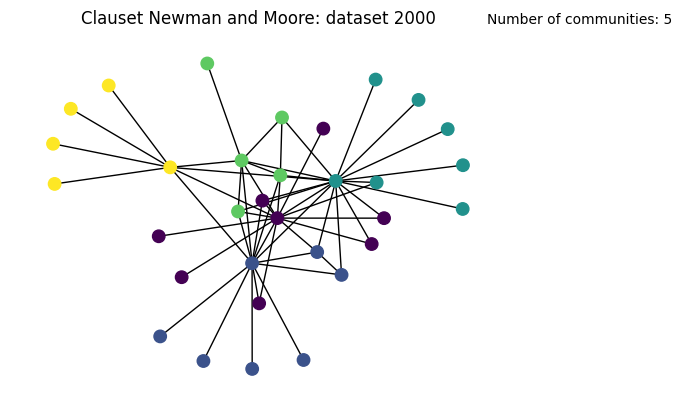

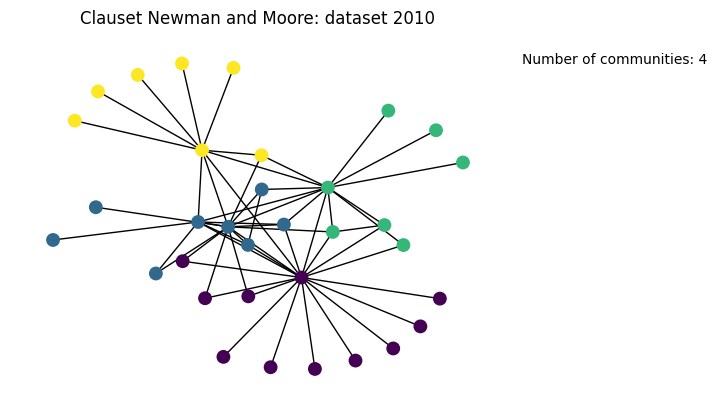

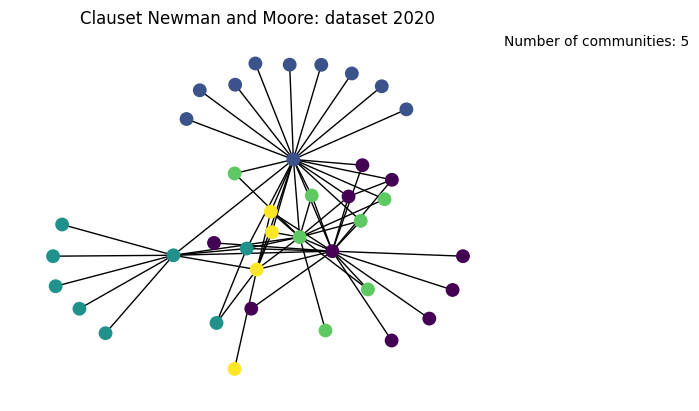

In [20]:
plot_community('2000',graphs['2000'])
plt.show()
plot_community('2010',graphs['2010'])
plt.show()
plot_community('2020',graphs['2020'])
plt.show()

## b) Louvain method

In [21]:
import community as community_louvain
import matplotlib.cm as cm

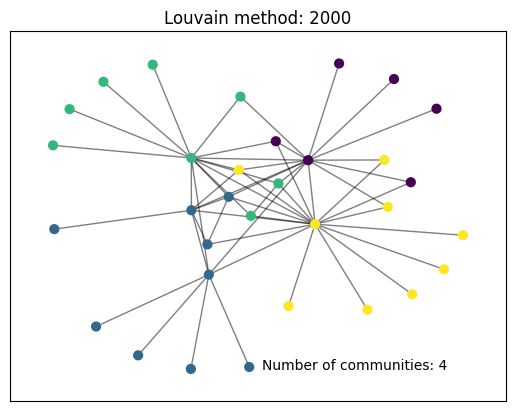

In [22]:
plt.title("Louvain method: 2000")
partition = community_louvain.best_partition(graphs['2000'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['2000'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2000'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2000'], pos, alpha=0.5)
plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

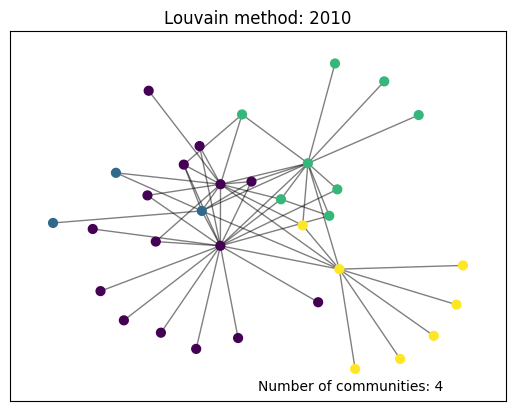

In [23]:
plt.title("Louvain method: 2010")
partition = community_louvain.best_partition(graphs['2010'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['2010'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2010'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2010'], pos, alpha=0.5)
plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

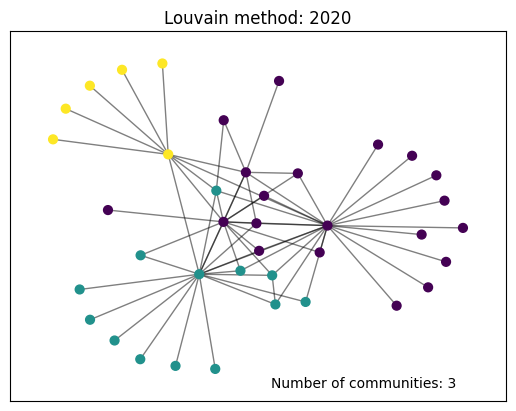

In [24]:
plt.title("Louvain method: 2020")
partition = community_louvain.best_partition(graphs['2020'],weight = 'Aircraft_Trips')
pos = nx.spring_layout(graphs['2020'])
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2020'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2020'], pos, alpha=0.5)
plt.text(0.1,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

## with geolocation as pos

In [25]:
df = pd.read_csv("data/Australia_airline/Australia Geolocation.csv")

In [26]:
df.set_index('City1',inplace = True)

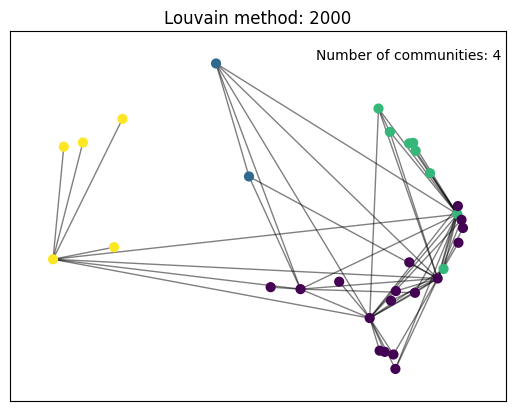

In [27]:
plt.title("Louvain method: 2000")
partition = community_louvain.best_partition(graphs['2000'],weight = 'Aircraft_Trips')
pos = {}
for i in partition.keys():
    p = np.array([df.loc[i]['Long'],df.loc[i]['Lat']])
    pos[i] = p
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2000'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2000'], pos, alpha=0.5)
plt.text(140,-12,"Number of communities: " + str(max(partition.values())+1))
plt.show()

In [28]:
c0,c1,c2,c3,c4 = [],[],[],[],[]
for k,v in partition.items():
    if v == 0:
        c0.append(k)
    if v == 1:
        c1.append(k)
    if v == 2:
        c2.append(k)
    if v == 3:
        c3.append(k)
    if v == 4:
        c4.append(k)

In [29]:
c0_long = []
c0_lat = []
for i in c0:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c0_long.append(long)
    c0_lat.append(lat)
c1_long = []
c1_lat = []
for i in c1:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c1_long.append(long)
    c1_lat.append(lat)
c2_long = []
c2_lat = []
for i in c2:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c2_long.append(long)
    c2_lat.append(lat)
c3_long = []
c3_lat = []
for i in c3:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c3_long.append(long)
    c3_lat.append(lat)

In [30]:
df_c0 = pd.DataFrame(list(zip(c0, c0_long, c0_lat)),
               columns =['City', 'Long', 'Lat'])
df_c1 = pd.DataFrame(list(zip(c1, c1_long, c1_lat)),
               columns =['City', 'Long', 'Lat'])
df_c2 = pd.DataFrame(list(zip(c2, c2_long, c2_lat)),
               columns =['City', 'Long', 'Lat'])
df_c3 = pd.DataFrame(list(zip(c3, c3_long, c3_lat)),
               columns =['City', 'Long', 'Lat'])

In [31]:
df_2000 = pd.read_csv("data/Australia_airline/map/2000.csv")
lons = []
lats = []
lons = np.empty(3 * len(df_2000))
lons[::3] = df_2000['start_lon']
lons[1::3] = df_2000['end_lon']
lons[2::3] = None
lats = np.empty(3 * len(df_2000))
lats[::3] = df_2000['start_lat']
lats[1::3] = df_2000['end_lat']
lats[2::3] = None

In [32]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c0['Long'],
    lat = df_c0['Lat'],
    hoverinfo = 'text',
    text = df_c0['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c1['Long'],
    lat = df_c1['Lat'],
    hoverinfo = 'text',
    text = df_c1['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 255, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c2['Long'],
    lat = df_c2['Lat'],
    hoverinfo = 'text',
    text = df_c2['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 0, 255)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c3['Long'],
    lat = df_c3['Lat'],
    hoverinfo = 'text',
    text = df_c3['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255,255,0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
    go.Scattergeo(
        locationmode = 'ISO-3',
        lon = lons,
        lat = lats,
        mode = 'lines',
        line = dict(width = 1,color = 'black'),
        opacity = 0.5
    )
)

fig.update_layout(
    title_text = '2000 Australia flight network: 4 communities',
    showlegend = False,
    geo = go.layout.Geo(
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    height=700,
)

fig.show()

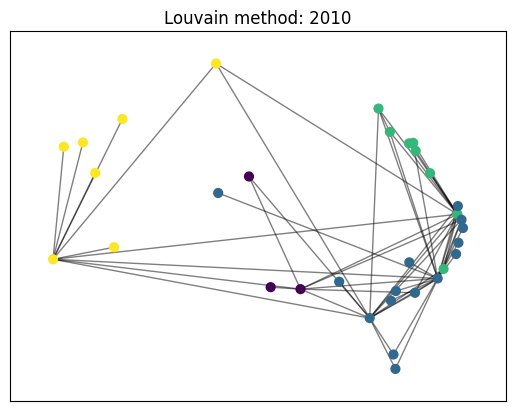

In [33]:
plt.title("Louvain method: 2010")
partition = community_louvain.best_partition(graphs['2010'],weight = 'Aircraft_Trips')
pos = {}
for i in partition.keys():
    p = np.array([df.loc[i]['Long'],df.loc[i]['Lat']])
    pos[i] = p
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2010'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2010'], pos, alpha=0.5)
#plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

In [34]:
c0,c1,c2,c3 = [],[],[],[]
for k,v in partition.items():
    if v == 0:
        c0.append(k)
    if v == 1:
        c1.append(k)
    if v == 2:
        c2.append(k)
    if v == 3:
        c3.append(k)

In [35]:
c0_long = []
c0_lat = []
for i in c0:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c0_long.append(long)
    c0_lat.append(lat)
c1_long = []
c1_lat = []
for i in c1:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c1_long.append(long)
    c1_lat.append(lat)
c2_long = []
c2_lat = []
for i in c2:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c2_long.append(long)
    c2_lat.append(lat)
c3_long = []
c3_lat = []
for i in c3:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c3_long.append(long)
    c3_lat.append(lat)

In [36]:
df_c0 = pd.DataFrame(list(zip(c0, c0_long, c0_lat)),
               columns =['City', 'Long', 'Lat'])
df_c1 = pd.DataFrame(list(zip(c1, c1_long, c1_lat)),
               columns =['City', 'Long', 'Lat'])
df_c2 = pd.DataFrame(list(zip(c2, c2_long, c2_lat)),
               columns =['City', 'Long', 'Lat'])
df_c3 = pd.DataFrame(list(zip(c3, c3_long, c3_lat)),
               columns =['City', 'Long', 'Lat'])

In [37]:
df_2010 = pd.read_csv("data/Australia_airline/map/2010.csv")
lons = []
lats = []
lons = np.empty(3 * len(df_2010))
lons[::3] = df_2010['start_lon']
lons[1::3] = df_2010['end_lon']
lons[2::3] = None
lats = np.empty(3 * len(df_2010))
lats[::3] = df_2010['start_lat']
lats[1::3] = df_2010['end_lat']
lats[2::3] = None

In [38]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c0['Long'],
    lat = df_c0['Lat'],
    hoverinfo = 'text',
    text = df_c0['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c1['Long'],
    lat = df_c1['Lat'],
    hoverinfo = 'text',
    text = df_c1['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 255, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c2['Long'],
    lat = df_c2['Lat'],
    hoverinfo = 'text',
    text = df_c2['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 0, 255)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c3['Long'],
    lat = df_c3['Lat'],
    hoverinfo = 'text',
    text = df_c3['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255,255,0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
    go.Scattergeo(
        locationmode = 'ISO-3',
        lon = lons,
        lat = lats,
        mode = 'lines',
        line = dict(width = 1,color = 'black'),
        opacity = 0.5
    )
)

fig.update_layout(
    title_text = '2010 Australia flight network: 3 communities',
    showlegend = False,
    geo = go.layout.Geo(
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    height=700,
)

fig.show()

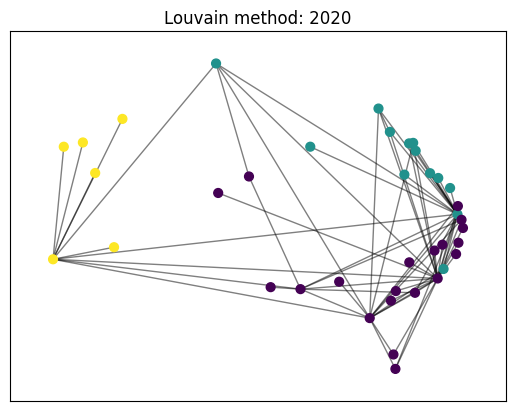

In [39]:
plt.title("Louvain method: 2020")
partition = community_louvain.best_partition(graphs['2020'],weight = 'Aircraft_Trips')
pos = {}
for i in partition.keys():
    p = np.array([df.loc[i]['Long'],df.loc[i]['Lat']])
    pos[i] = p
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graphs['2020'], pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graphs['2020'], pos, alpha=0.5)
#plt.text(0,-1,"Number of communities: " + str(max(partition.values())+1))
plt.show()

In [40]:
c0,c1,c2,c3 = [],[],[],[]
for k,v in partition.items():
    if v == 0:
        c0.append(k)
    if v == 1:
        c1.append(k)
    if v == 2:
        c2.append(k)
    if v == 3:
        c3.append(k)

In [41]:
c0_long = []
c0_lat = []
for i in c0:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c0_long.append(long)
    c0_lat.append(lat)
c1_long = []
c1_lat = []
for i in c1:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c1_long.append(long)
    c1_lat.append(lat)
c2_long = []
c2_lat = []
for i in c2:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c2_long.append(long)
    c2_lat.append(lat)
c3_long = []
c3_lat = []
for i in c3:
    long = df.loc[i]['Long']
    lat = df.loc[i]['Lat']
    c3_long.append(long)
    c3_lat.append(lat)

In [42]:
df_c0 = pd.DataFrame(list(zip(c0, c0_long, c0_lat)),
               columns =['City', 'Long', 'Lat'])
df_c1 = pd.DataFrame(list(zip(c1, c1_long, c1_lat)),
               columns =['City', 'Long', 'Lat'])
df_c2 = pd.DataFrame(list(zip(c2, c2_long, c2_lat)),
               columns =['City', 'Long', 'Lat'])
df_c3 = pd.DataFrame(list(zip(c3, c3_long, c3_lat)),
               columns =['City', 'Long', 'Lat'])

In [43]:
df_2020 = pd.read_csv("data/Australia_airline/map/2020.csv")
lons = []
lats = []
lons = np.empty(3 * len(df_2020))
lons[::3] = df_2020['start_lon']
lons[1::3] = df_2020['end_lon']
lons[2::3] = None
lats = np.empty(3 * len(df_2020))
lats[::3] = df_2020['start_lat']
lats[1::3] = df_2020['end_lat']
lats[2::3] = None

In [44]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c0['Long'],
    lat = df_c0['Lat'],
    hoverinfo = 'text',
    text = df_c0['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c1['Long'],
    lat = df_c1['Lat'],
    hoverinfo = 'text',
    text = df_c1['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 255, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c2['Long'],
    lat = df_c2['Lat'],
    hoverinfo = 'text',
    text = df_c2['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(0, 0, 255)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df_c3['Long'],
    lat = df_c3['Lat'],
    hoverinfo = 'text',
    text = df_c3['City'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255,255,0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))
fig.add_trace(
    go.Scattergeo(
        locationmode = 'ISO-3',
        lon = lons,
        lat = lats,
        mode = 'lines',
        line = dict(width = 1,color = 'black'),
        opacity = 0.5
    )
)

fig.update_layout(
    title_text = '2020 Australia flight network: 3 communities',
    showlegend = False,
    geo = go.layout.Geo(
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    height=700,
)

fig.show()

## Map

In [45]:
df = pd.read_csv("data/Australia_airline/Australia Geolocation.csv")

In [46]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    locationmode = 'ISO-3',
    lon = df['Long'],
    lat = df['Lat'],
    hoverinfo = 'text',
    text = df['City1'],
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

In [47]:
df_1999 = pd.read_csv("data/Australia_airline/map/1999.csv")

In [48]:
lons = []
lats = []
lons = np.empty(3 * len(df_1999))
lons[::3] = df_1999['start_lon']
lons[1::3] = df_1999['end_lon']
lons[2::3] = None
lats = np.empty(3 * len(df_1999))
lats[::3] = df_1999['start_lat']
lats[1::3] = df_1999['end_lat']
lats[2::3] = None

In [49]:
fig.add_trace(
    go.Scattergeo(
        locationmode = 'ISO-3',
        lon = lons,
        lat = lats,
        mode = 'lines',
        line = dict(width = 1,color = 'black'),
        opacity = 0.5
    )
)

In [50]:
fig.update_layout(
    title_text = 'Australia domestic airline network',
    showlegend = False,
    geo = go.layout.Geo(
        #scope = 'asia',
        #projection_type = 'airy',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
    height=700,
)
fig.show()

# Route changes and classification

In [51]:
def readcsv(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        item_path = os.path.join(datasets_folder,item)
        item_name = item.split(".")[0]
        print("dataset named "+item_name+" imported")
        df = pd.read_csv(item_path)
        d["{}".format(item_name)] = df
    print("finish importing")
    return d

In [52]:
df = readcsv("data/Australia_airline/yearly_data")

dataset named 1990 imported
dataset named 1984 imported
dataset named 1985 imported
dataset named 1991 imported
dataset named 1987 imported
dataset named 1993 imported
dataset named 1992 imported
dataset named 1986 imported
dataset named 1996 imported
dataset named 1997 imported
dataset named 1995 imported
dataset named 1994 imported
dataset named 2008 imported
dataset named 2020 imported
dataset named 2021 imported
dataset named 2009 imported
dataset named 2022 imported
dataset named 2019 imported
dataset named 2018 imported
dataset named 2001 imported
dataset named 2015 imported
dataset named 2014 imported
dataset named 2000 imported
dataset named 2016 imported
dataset named 2002 imported
dataset named 2003 imported
dataset named 2017 imported
dataset named 2013 imported
dataset named 2007 imported
dataset named 2006 imported
dataset named 2012 imported
dataset named 2004 imported
dataset named 2010 imported
dataset named 2011 imported
dataset named 2005 imported
dataset named 1999 i

In [53]:
df_2000_sorted = df['2000'].sort_values(by=['City Distance_(km)'])
df_2000_sorted['count_passenger_running_total'] = df_2000_sorted['Passenger_Trips'].cumsum()
weight = max(df_2000_sorted['count_passenger_running_total'])
df_sorted = {}
for year,dataframe in df.items():
    df_year_sorted = dataframe.sort_values(by=['City Distance_(km)'])
    df_year_sorted['count_passenger_running_total'] = df_year_sorted['Passenger_Trips'].cumsum()
    df_year_sorted['passenger_running_total_percent'] = df_year_sorted['count_passenger_running_total']/weight
    df_year_sorted['passenger_running_total_percent_unweighted'] = df_year_sorted['count_passenger_running_total']/max(df_year_sorted['count_passenger_running_total'])
    df_sorted[year] = df_year_sorted

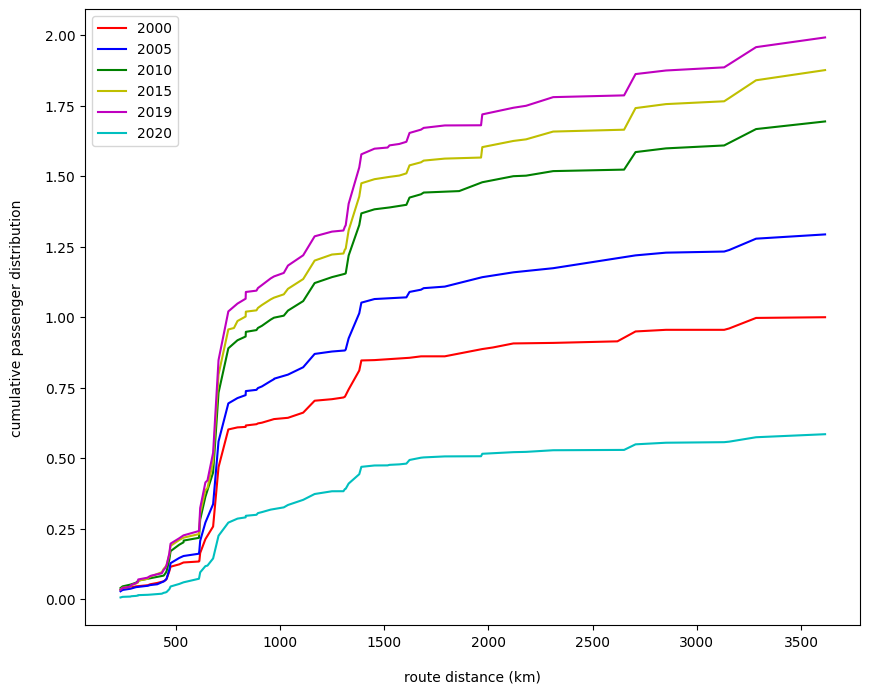

In [54]:
ax = df_sorted['2000'].plot(x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                         figsize=(10, 8), legend=False, style='r-',label='2000')
df_sorted['2005'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                    figsize=(10, 8), legend=False, style='b-',label='2005')
df_sorted['2010'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                    figsize=(10, 8), legend=False, style='g-',label='2010')
df_sorted['2015'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                    figsize=(10, 8), legend=False, style='y-',label='2015')
df_sorted['2019'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                    figsize=(10, 8), legend=False, style='m-',label='2019')
df_sorted['2020'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent', kind='line', 
                    figsize=(10, 8), legend=False, style='c-',label='2020')
plt.ylabel("cumulative passenger distribution", labelpad=15)
plt.xlabel("route distance (km)", labelpad=15)
plt.legend()

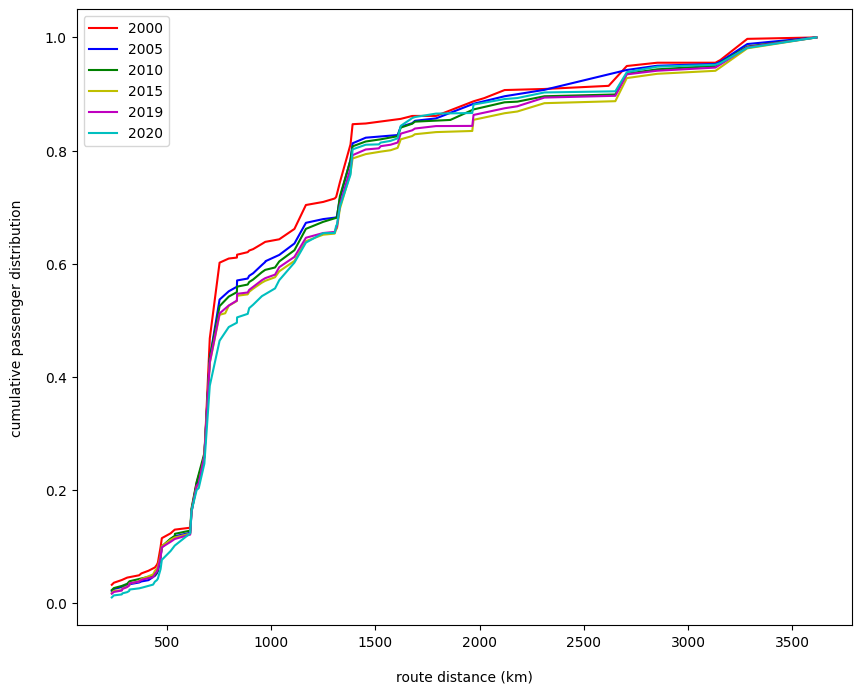

In [55]:
ax = df_sorted['2000'].plot(x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                         figsize=(10, 8), legend=False, style='r-',label='2000')
df_sorted['2005'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                    figsize=(10, 8), legend=False, style='b-',label='2005')
df_sorted['2010'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                    figsize=(10, 8), legend=False, style='g-',label='2010')
df_sorted['2015'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                    figsize=(10, 8), legend=False, style='y-',label='2015')
df_sorted['2019'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                    figsize=(10, 8), legend=False, style='m-',label='2019')
df_sorted['2020'].plot(ax=ax,x='City Distance_(km)', y='passenger_running_total_percent_unweighted', kind='line', 
                    figsize=(10, 8), legend=False, style='c-',label='2020')
plt.ylabel("cumulative passenger distribution", labelpad=15)
plt.xlabel("route distance (km)", labelpad=15)
plt.legend()

In [56]:
#d_500 = {}
d_1000 = {}
#d_1500 = {}
d_2000 = {}
#d_2500 = {}
d_3000 = {}
#d_3500 = {}
d_4000 = {}
for year, dataframe in df_sorted.items():
    #num_500 = 0
    num_1000 = 0
    #num_1500 = 0
    num_2000 = 0
    #num_2500 = 0
    num_3000 = 0
    #num_3500 = 0
    num_4000 = 0
    for i in dataframe['City Distance_(km)']:
        #if i < 500:
        #    num_500 += 1
        if i <1000:
            num_1000 += 1
        #elif i <1500:
        #    num_1500 += 1
        elif i <2000:
            num_2000 += 1
        #elif i <2500:
        #    num_2500 += 1
        elif i <3000:
            num_3000 += 1
        #elif i <3500:
        #    num_3500 += 1
        else:
            num_4000 += 1
    #d_500[year] = num_500
    d_1000[year] = num_1000
    #d_1500[year] = num_1500
    d_2000[year] = num_2000
    #d_2500[year] = num_2500
    d_3000[year] = num_3000
    #d_3500[year] = num_3500
    d_4000[year] = num_4000

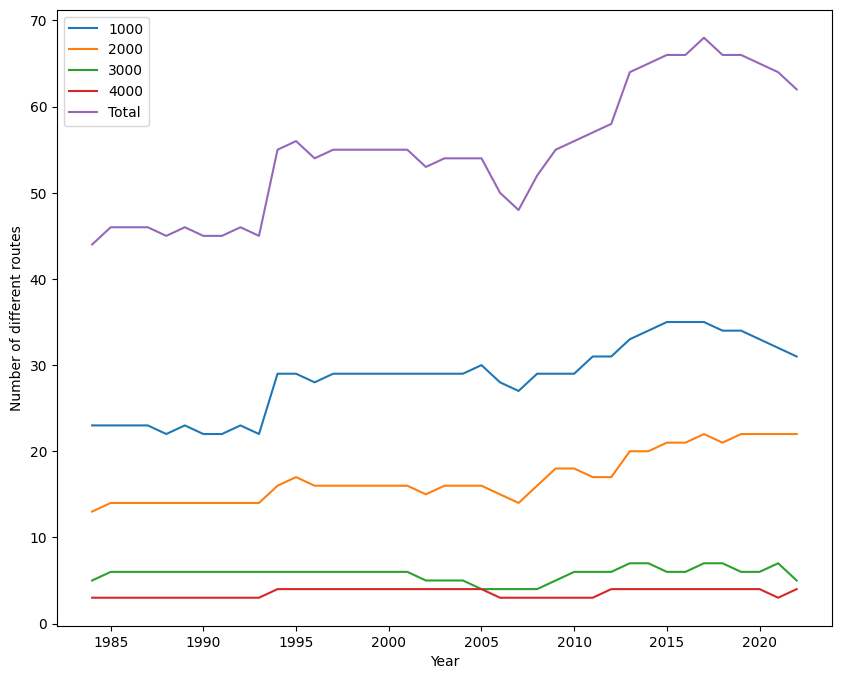

In [57]:
'''lists_500 = sorted(d_500.items())
x_500, y_500 = zip(*lists_500)
x_500 = tuple(map(int, x_500))'''

lists_1000 = sorted(d_1000.items())
x_1000, y_1000 = zip(*lists_1000)
x_1000 = tuple(map(int, x_1000))

'''lists_1500 = sorted(d_1500.items())
x_1500, y_1500 = zip(*lists_1500)
x_1500 = tuple(map(int, x_1500))'''

lists_2000 = sorted(d_2000.items())
x_2000, y_2000 = zip(*lists_2000)

'''lists_2500 = sorted(d_2500.items())
x_2500, y_2500 = zip(*lists_2500)
x_2500 = tuple(map(int, x_2500))'''

lists_3000 = sorted(d_3000.items())
x_3000, y_3000 = zip(*lists_3000)

'''lists_3500 = sorted(d_3500.items())
x_3500, y_3500 = zip(*lists_3500)
x_3500 = tuple(map(int, x_3500))'''

lists_4000 = sorted(d_4000.items())
x_4000, y_4000 = zip(*lists_4000)

res = tuple(map(sum, zip(y_1000, y_2000, y_3000, y_4000)))

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
#plt.plot(x_500,y_500,label = '500')
plt.plot(x_1000,y_1000,label = '1000')
#plt.plot(x_1500,y_1500,label = '1500')
plt.plot(x_1000,y_2000,label = '2000')
#plt.plot(x_2500,y_2500,label = '2500')
plt.plot(x_1000,y_3000,label = '3000')
#plt.plot(x_3500,y_3500,label = '3500')
plt.plot(x_1000,y_4000,label = '4000')
plt.plot(x_1000,res,label = 'Total')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of different routes")
plt.show()

# Random model

In [58]:
len(graphs['2019'].nodes())

40

In [59]:
p = np.linspace(0.05,0.4,6)

Text(0, 0.5, 'degree_centrality')

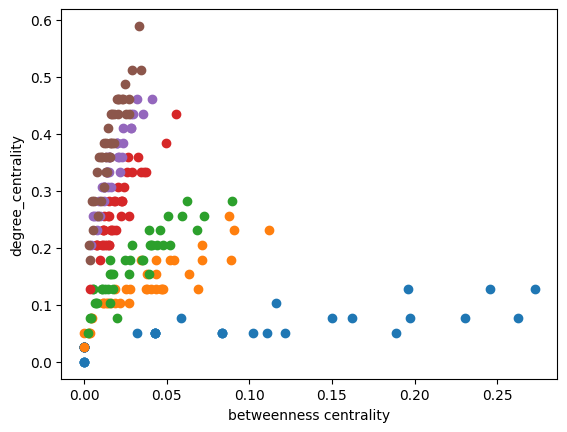

In [60]:
for i in p:
    grnd = nx.erdos_renyi_graph(40,i)
    d = nx.degree_centrality(grnd)
    b = nx.betweenness_centrality(grnd)
    x = list(b.values())
    y = list(d.values())
    plt.scatter(x, y)
plt.xlabel('betweenness centrality')
plt.ylabel('degree_centrality')